# Probability and Random Variables

We use the language of probability to give structure to uncertain and complex processes. When we talk about a "random variable" we mean an observable phenomenon that takes values in a particular universe of possibility.

For example, flipping a coin can take values in $\{H, T\}$, and to each we assign a probability $P(H)$ and $P(T)$.

So to fully consider a random variable variable, we need three things:
1. The random variable itself (the actual outcome) -- $X$
2. The set of possibilities -- $\Omega$
3. The probability function that maps the possibilities to values -- $P$

We then say that the triple $(X,\Omega, P)$ forms a probability space.

Furthermore, we require that $P$ satisfies the following:
1. $0 \leq P(\omega) \leq 1$ for all $\omega \in \Omega$.
2. $\sum_{\omega \in \Omega} P(\omega) = 1$

## Discrete Random Variables

The random variable $X$ is said to be discrete if $\Omega$ is countable (either finite or countably infinite). For completeness, a set $A$ is countably infinite if there exists a bijection $f:\mathbb{N} \to A$.

Examples:
- flip of a coin
- number of people in a class
- the number of times a person has been picked last for volleyball

Let $(X, \Omega, P)$ be a discrete probability space with $\Omega \subset \mathbb{R}$.

We will define the cumulative probability function (cdf) for random variable $X$ as
$$ P(X \leq t) = F_X(t) = \sum_{\omega \leq t} P(X = \omega) $$
i.e. the sum of probabilities for all values at most $t$.

We can now come back to statistical quantities, but now in terms of a random variable:
the mean is
$$ \mathbb{E} X = \sum_{x \in \Omega} x P(x) $$
and the variance is
$$ \operatorname{Var}(X) = \mathbb{E}(X - \mathbb{E}X)^2 $$

## Continuous Random Variables

A random variable $X$ is continuous if the associated $\Omega$ is not countably infinite. 

For example:
- A random draw from $(0,1)$
- Temperature measured on a day (with infinite precision)
- Measuring speed of cars on a road at a certain location

So now we have a $P: \Omega \to \mathbb{R}$ that is continuous (maybe with some points of discontinuity). We then define the cdf of $X$ as $F_X(t) = P(X \leq t)$ which is usually defined for that specific random variable/distribution. However, most common continuous random variables have a Probability Denisty Function (pdf) called $f_X(x)$ so that 
$$ F_X(t) = P(X \leq t) = \int_{-\infty}^{t} f_X(x) dx $$


We then define the mean as 
$$ \mathbb{E}X = \int_{-\infty}^{\infty} x f_X(x) dx = \left[ \int_{-\infty}^{\infty} x dF_X(x) \right]$$

### Example: Uniform distribution

Look at uniform draw from interval $(0,1)$. Call this draw $X$. The distribution of this is denoted $U(0,1)$ when all values have equal probability, i.e. the uniform distribution on $(0,1)$.

The pdf of this is then 
$$ f_X(x) = 
\begin{cases}
0 \text{ if } x \not \in (0,1) \\
1 \text{ otherwise}
\end{cases}
$$
because we still need the law of total probability:
$$ \int_{-\infty}^{\infty} f_X(x) dx = \int_{0}^{1} f_X(x) dx = 1 $$

In general for interval $(a,b)$ the uniform distribution has pdf 
$$ f(x) =
\begin{cases}
0 \text{ if } x \not \in (a,b) \\
\frac{1}{b-a} \text{ otherwise}
\end{cases}
$$

In [3]:
def uniform_pdf(x,a,b):
    return 1/(b-a) if a <= x and x <= b else 0

def uniform_cdf(t,a,b):
    if t < a:
        return 0
    if t > b:
        return 1
    return (t-a)/(b-a)

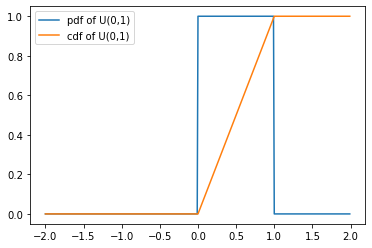

In [4]:
from matplotlib import pyplot as plt
import numpy as np

xs = np.arange(-2,2,0.01)
ys = [uniform_pdf(x,0,1) for x in xs]
plt.plot(xs, ys)

ys = [uniform_cdf(x,0,1) for x in xs]
plt.plot(xs, ys)

plt.legend(['pdf of U(0,1)', 'cdf of U(0,1)'])

Now, for random variable $X$ distributed as $U(a,b)$, calculate the cdf:
First, suppose $t \in (a,b)$.

$$ F_X(t) = \int_{-\infty}^{t} f_X(x) dx = \int_{a}^{t} \frac{1}{b-a} dx = \frac{1}{b-a} x \bigg \vert_{a}^{t} = \frac{t}{b-a} - \frac{a}{b-a} = \frac{t-a}{b-a}$$
so final form:

$$ F_X(t) = 
\begin{cases}
0 \text{ if } t <= a \\
\frac{t-a}{b-a} \text{ if } t \in (a,b) \\
1 \text{ if } t > b \\
\end{cases}
$$

Try calculating the mean of $X$ when distributed as $U(0,1)$:

$$\mathbb{E}X = \int_{-\infty}^{\infty} x f_X(x) dx = \int_{0}^{1} x dx = \frac{x^2}{2} \bigg \vert_{0}^{1} = 1/2 $$

Exercise: do variance for $U(0,1)$.

### Example: Normal Distribution

Also called the Gaussian distribution, the pdf is
$$ f_X(x; \mu, \sigma) = \frac{1}{\sigma \sqrt{2 \pi}} \exp\left( -\frac{(x-\mu)^2}{2 \sigma^2} \right) $$
and we normally abbreviate this distrubtion $ \mathcal{N}(\mu, \sigma^2) $.
In this formulation, the mean is $\mu$ and variance $\sigma^2$.
This distribution has cdf
$$ F_X(x; \mu, \sigma) = \frac{1}{2} \left[ 1 + \operatorname{erf} \left( \frac{x-\mu}{\sigma \sqrt{2}} \right) \right] $$

In [5]:
import math

def normal_pdf(x, mu, sigma):
    return (1/(sigma*np.sqrt(2 * np.pi))) * np.exp(-1*(x - mu)**2 / (2 * sigma**2))

def normal_cdf(x, mu, sigma):
    return (1 + math.erf((x-mu)/(sigma*np.sqrt(2))))/2

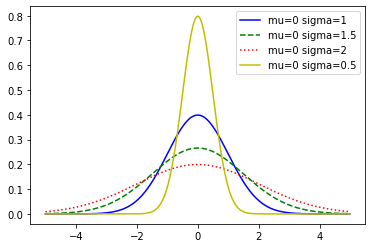

In [6]:
xs = np.arange(-5,5,0.01)
plt.plot(xs, [normal_pdf(x,0,1) for x in xs], 'b', label='mu=0 sigma=1')
plt.plot(xs, [normal_pdf(x,0,1.5) for x in xs], 'g--', label='mu=0 sigma=1.5')
plt.plot(xs, [normal_pdf(x,0,2) for x in xs], 'r:', label='mu=0 sigma=2')
plt.plot(xs, [normal_pdf(x,0,0.5) for x in xs], 'y', label='mu=0 sigma=0.5')
plt.legend()

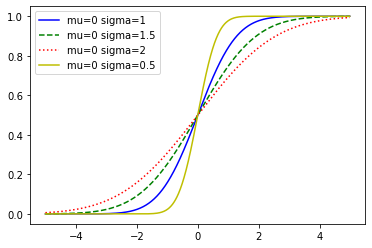

In [7]:
xs = np.arange(-5,5,0.01)
plt.plot(xs, [normal_cdf(x,0,1) for x in xs], 'b', label='mu=0 sigma=1')
plt.plot(xs, [normal_cdf(x,0,1.5) for x in xs], 'g--', label='mu=0 sigma=1.5')
plt.plot(xs, [normal_cdf(x,0,2) for x in xs], 'r:', label='mu=0 sigma=2')
plt.plot(xs, [normal_cdf(x,0,0.5) for x in xs], 'y', label='mu=0 sigma=0.5')
plt.legend()

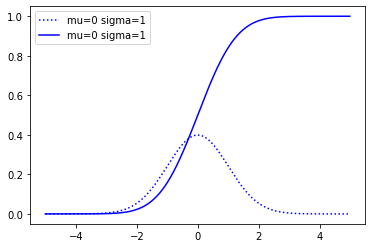

In [8]:
xs = np.arange(-5,5,0.01)
plt.plot(xs, [normal_pdf(x,0,1) for x in xs], 'b:', label='mu=0 sigma=1')
plt.plot(xs, [normal_cdf(x,0,1) for x in xs], 'b', label='mu=0 sigma=1')
plt.legend()

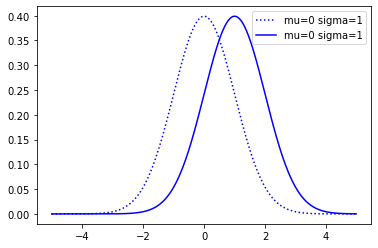

In [9]:
xs = np.arange(-5,5,0.01)
plt.plot(xs, [normal_pdf(x,0,1) for x in xs], 'b:', label='mu=0 sigma=1')
plt.plot(xs, [normal_pdf(x,1,1) for x in xs], 'b', label='mu=0 sigma=1')
plt.legend()

# Central Limit Theorem

Let $X$ be *any* random variable with mean $\mu$ and variance $\sigma^2$.
Then if you have $x_1, x_2, \dots, x_N$ iid (independent and identially distributed) copies/observations of $X$, the quantity
$$ \bar{x} = \frac{1}{N} (x_1 + x_2 + \dots + x_N) $$
will, if $N$ is large enough, behave like $\mathcal{N}\left( \mu, \frac{\sigma^2}{N} \right)$.
That is the empirical mean (interpreted now as a random variable) will look normal, if enough samples are used.

Notice that the variance of this depends on $N$ but the mean does not.
So if you increase $N$, i.e. draw more samples, the variance of your empirical mean goes down.

### Case study: flipping a coin.

We're given a (maybe unfair) coin that flips heads with probabilitiy $p$ and tails with probability $1-p$.
We want to estimate what $p$ by flipping the coin ourselves.

So lets repeat the following experiment: Flip the coin $n$ times, calculate the average.
But after repeating this, look at the distribution of values. What will it look like?

A coin flip is usually referred to as a Bernoilli random variable.
Call this distribution $\operatorname{Bernoulli}(p)$, which then has mean p and variance __ .
The value of a Bernoulli random variable is 1 with probability $p$ and 0 with probability $1-p$.

So its mean is calculate as:

$$ p \cdot 1 + (1-p) \cdot 0 = p $$

The variance $\mathbb{E} (X - \mathbb{E}(X))^2$ is:

$$ 
\begin{align*}
\mathbb{E}(X - p)^2 &= \mathbb{E}( X^2 -2pX + p^2) \\
&= \mathbb{E}(X^2) - 2p\mathbb{E}(X) + p^2 \; \text{ by linearity} \\
&= \mathbb{E}(X^2) - 2p^2 + p^2 \\ 
&= \mathbb{E}(X^2) - p^2 \\
&= p - p^2 = p(1-p)
\end{align*}
$$

Side note: expectation is linear. I.e.
$$ \mathbb{E}(aX + bY) = a\mathbb{E}(X) + b\mathbb{E}(Y) $$
Also, for any constant $a$, $\mathbb{E}(a) = a$.

Now, we talk about the quantity $X_1 + X_2 + \dots + X_n$ when each $X_i$ is Bernoulli$(p)$ is called the Binomial distribution, denote as $\operatorname{Binom(n,p)}$.
The mean of a Binomial$(n,p)$ is
$$ \mathbb{E}(X_1 + X_2 + \dots + X_N) = \mathbb{E}(X_1) + \dots + \mathbb{E}(X_N) = np $$
The variance is then
$$
\operatorname{Var}(X_1 + X_2 + \dots + X_N) = n \operatorname{Var}(X_1) = np(1-p)
$$

Variance is also distributive over addition, but is homogeneous degree 2.
That is, $\operatorname{Var}(aX + bY) = a^2 \operatorname{Var}(X) + b^2 \operatorname{Var}(Y) $

So the distribution of my estimated mean will behave like $\mathcal{N}(np, np(1-p))$.

Counter({49: 806, 50: 790, 52: 729, 51: 719, 48: 714, 47: 684, 53: 674, 46: 600, 54: 587, 45: 496, 55: 491, 44: 389, 56: 381, 57: 312, 43: 307, 42: 233, 58: 209, 41: 157, 59: 133, 60: 119, 40: 112, 39: 72, 61: 65, 62: 57, 38: 38, 63: 33, 37: 30, 36: 15, 64: 14, 65: 8, 33: 6, 35: 6, 67: 5, 34: 4, 66: 2, 68: 2, 31: 1})


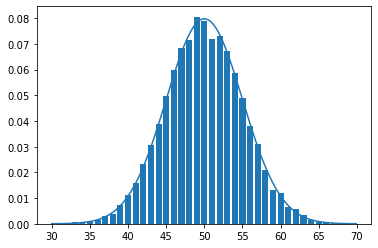

In [10]:
from collections import Counter

N = 100
bias = 0.5
num_trials = 10000

def binom_draw(n,p):
    """Generate one draw from a Binomial(n,p) distribution"""
    return np.sum(np.random.choice([0,1],size=n,p=[1-p,p]))

# get the number of successes num_trials times
observations = [binom_draw(N,bias) for _ in range(num_trials)]

# want to plot the distribution of these observations
# we could fancier histogram methods, or for fun do it by hand

counts = Counter(observations)
print(counts)

plt.bar([x for x in counts.keys()], [v / num_trials for v in counts.values()])

# now compare with actual normal pdf
mu = N*bias
sigma = math.sqrt(N*bias*(1-bias))

xs = np.arange(30,70,0.1)
plt.plot(xs, [normal_pdf(x,mu,sigma) for x in xs])

In [11]:
# help(np.random.choice)
#np.random.choice([0,1],p=[0.5, 0.5],size=10)
binom_draw(10,0.2)

2

## Confidence Measurement -- Confidence Intervals

When we're calculating, specifcally, the mean of a quantity, we assign to it a _confidence interval_ by calculating the _standard error_ of the estimator:

If we call $\bar{x}$ the mean, then the **Standard Error** of $\bar{x}$ is denoted and defined as

$$
\operatorname{SE} := \operatorname{std}(\bar{x}) = \sqrt{\operatorname{var}(\bar{x})} = \frac{\sigma_x}{\sqrt{N}} .
$$

So the CLT implies that if $N$ is large enough, $\bar{x}$ behaves normally, and we use $\sigma_{\bar{x}}$ as a substitute, which is typically suitable when $n > 30$.

Once we have the SE, we will build a confidence interval around the observed $\bar{x}$ as
$$
[\bar{x} - 1.96 \cdot \operatorname{SE}, \bar{x} + 1.96 \cdot \operatorname{SE} ]
$$
because, if $\bar{x}$ truly behaves as a normal distribution, this interval contains 95% of the probability mass.

Example: with a hidden bias, estimate the bias of a coin:

- Want an $\bar{x}$
- Need SE
- So we need $\operatorname{std}_{\bar{x}}$.
- Then we calculate the interval as above

In [13]:
# binom_draw(10,p)

In [15]:
import stats
n = 1000
p = 0.5

# TODO: discuss/investigate boostrapping this thing...
se = stats.std([ binom_draw(n,p)/n for i in range(0,31) ])
print(f'SE of xbar is {se}')

xbar = binom_draw(n,p)/n

interval_low = xbar - 1.96*se
interval_high = xbar + 1.96*se

print(f'We think the bias is about {xbar} with a confidence inverval of [{interval_low}, {interval_high}]')

SE of xbar is 0.010930106204613061
We think the bias is about 0.492 with a confidence inverval of [0.4705769918389584, 0.5134230081610416]


In [16]:
# Example to plot/visualize error bars (i.e. confidence intervals):

# In the example: we had data of thousands of cars, we know their model
# and whether or not they broke down in the first month of owning them.
# We grouped by model and then calculated the percent that broke down
# in the first month for each group (i.e. estimated the bias of the breakdown 'coin')
# Say we have a dataframe that has mean averaged along each column:

import pandas as pd

df = pd.DataFrame({
    'Avg Breakdown Rate': [
        13.5,
        31.9,
        20.1,
        15.9
    ],
    'SE': [
        1.5,
        2.0,
        0.8,
        2.4
    ],
    'Model': [
        'Model X', 
        'Model Y', 
        'Model Z', 
        'Model A',
    ]
})

df


,Avg Breakdown Rate,SE,Model
0,13.5,1.5,Model X
1,31.9,2.0,Model Y
2,20.1,0.8,Model Z
3,15.9,2.4,Model A


<BarContainer object of 4 artists>

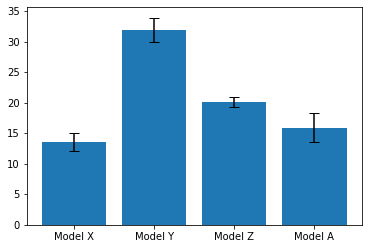

In [17]:
plt.bar(df['Model'], df['Avg Breakdown Rate'], yerr=df['SE'], capsize=5)

In [18]:
N = 1000
cars = pd.DataFrame({
    'Brokedown': np.random.choice([0,1], size=N, p=[0.8, 0.2]),
    'Model': np.random.choice(['Model X', 'Model Y', 'Model Z', 'Model A'], size=N)
})
cars.groupby('Model').mean()

,Brokedown
Model,
Model A,0.197628
Model X,0.174089
Model Y,0.232824
Model Z,0.172269


**In a pratical setting with actual data:** We can't _just_ get more data. So what to do to get the estimates for $\sigma$ and $\bar{x}$?

- Work with subsets of the full data!
  - Partition into disjoint subsets
    - Potential bias within each group with structured partitioning/slicing
    - Shuffle first, then slice successive subsets
    - You can then measure the variability between each subgroup and "propogate" through to final estimate
  - Partition into fixed size subsets but with replacement

In [19]:
means = [
    #[cars.loc[np.random.choice(np.arange(1,len(cars)),size=1)] for i in range(0,100)]
    #cars2[[cars2.loc[i]['index'] in np.random.choice(np.arange(1,len(cars)),size=1) for i in range(0,len(cars2))]]
    stats.mean(cars.sample(100, replace=True)['Brokedown'].values)
    for j in range(0,31)]

se = stats.std(means)

se



0.03617796225844923

In [20]:
cars.sample(4)['Brokedown'].values

array([0, 0, 0, 0])

In [21]:
cars

,Brokedown,Model
0,0,Model Y
1,0,Model Y
2,0,Model Y
3,0,Model Y
4,0,Model X
...,...,...
995,0,Model Z
996,0,Model A
997,0,Model Z
998,0,Model Z


# Hypothesis Testing

Idea: reverse the logic of confidence intervals to either accept or reject a conclusion based on the probability of it happening, as observed by some samples.

What we need is a *null hypothesis* often called $H_0$.
This needs to be some fact about a quantity or esitmator or underlying process.

In our coin flipping example, a possible null hypothesis. I.e. our hypothesis is that $p = 0.5$.

We're going to study in a similar way as before, by flipping the coin and working backwards.

Recall that flipping a coin with bias $p$ $n$ times will behave (according to the CLT) like $\mathcal{N}(np, p(1-p)n)$.

The conclusion we will want to make is of the form: "if we observe the average we did, what would the probability be of that happening, if $H_0$ were true?"

In [22]:
# Example Hypothesis testing: coin flip

def normal_approx_of_flips(n,p):
    """calculate mu and sigma of Normal approximation to Bimomial(n,p)"""
    mu = n*p
    sigma = math.sqrt(p*(1-p)*n)
    return mu, sigma

In [23]:
mu,sigma = normal_approx_of_flips(10,0.2)
print(mu)
print(sigma)

2.0
1.2649110640673518


For a random variable $X$ with CDF $F_X$, we will often need the *inverse CDF*, denoted and defined as 

$$ F^{-1}_X(p) = \inf \{ x \vert F_X(x) \geq p \}. $$

Note: $F^{-1}_X : [0,1] \rightarrow [-\infty, \infty]$.

In [41]:
# do this numerically, with everybody's favorite COSC 120 algorithm: 
def inverse_normal_cdf(p, mu, sigma):
    """Approximate smallest x such that normal_cdf(x,mu,sigma) >= p"""
    low = -1 # TODO: make this dynamic based on mu and sigma
    while( normal_cdf(low, mu, sigma) > 1e-10 ):
        low *= 2
    high = 1
    while( normal_cdf(high, mu, sigma) < 1-1e-10 ):
        high *= 2
    
    # Structure of binary search: 
    #  - check middle: (high+low)/2
    #  - if cdf(middle) < p, low = middle
    #    else high = middle
    #  - stop when |high-low| < tolerance
    
    tol = 1e-5

    # as a backup to avoid weirdness when convergence takes too long,
    # could build in a max iteration count too...
    
    while abs(high-low) > tol:
        mid_x = (low+high)/2
        mid_p = normal_cdf(mid_x, mu, sigma)
        
        if mid_p < p:
            low = mid_x
        else:
            high = mid_x
            
    return mid_x

In [30]:
inverse_normal_cdf(0.5, 0, 1)

-9.5367431640625e-06

In [26]:
# We will also need to calculate the tail probabilities of the normal distribution:
# i.e. P(X > t), P( a < X < b)

def normal_probability_above(t, mu, sigma):
    """Calculate P(X > t)"""
    # int from t to inf is 1 - int from -inf to t
    return 1 - normal_cdf(t,mu,sigma)

def normal_probability_between(a,b,mu,sigma):
    return normal_cdf(b,mu,sigma) - normal_cdf(a,mu,sigma)

def normal_probability_outside(a,b,mu,sigma):
    return 1 - normal_probability_between(a,b,mu,sigma)

## Aside motivation: A/B testing

For an online service, want to know: does making a particular UI change effect the user behavior in a significant/predictable way? For example, if we change the color of the "Buy Now" button, will more users click it?

To do this, randomly decide which users get which button -- and of course make a record of which they got -- and then see whether or not they click it. Once you have these, want to test the *null hypothesis* that the average click rate of the new button is higher than the old button by at least a particular amount. Conversely, test whether the two means are about the same.

In [44]:
def normal_upper_bound(p, mu, sigma):
    """Tell us what value z is such that P(X <= z) = p"""
    return inverse_normal_cdf(p, mu, sigma)

def normal_lower_bound(p, mu, sigma):
    """get z so that P(X >= z) = p"""
    return inverse_normal_cdf(1-p, mu, sigma)

def normal_two_side_bound(p, mu, sigma):
    """Get the range around mu so that P(a < X < b) = p"""
    tail = (1-p)/2
    
    # bottom because we want upper bound the left tail
    bottom = normal_upper_bound(tail, mu, sigma)
    
    # top because want to lower bound the right tail
    top = normal_lower_bound(tail, mu, sigma)
    
    return bottom, top

In [45]:
# For the example of testing H0 = coin is fair, i.e. p = 0.5
mu_0, sigma_0 = normal_approx_of_flips(1000, 0.5)

# Choose 95% as the desired range, the standard choice
lower, upper = normal_two_side_bound(0.95, mu_0, sigma_0)

print(f"95% confidence range is ({lower}, {upper})")

95% confidence range is (469.010250993073, 530.9897556677461)


Output above at time of writing was `95% confidence range is (530.9897556677461, 469.010250993073)`.
So, if our coin were fair, after 1000 flips, 95% of the time, the number of heads will be between 469 and 530.

In [61]:
# So do the experiment and see!

binom_draw(1000, 0.46)

458

In [33]:
sigma_0

15.811388300841896

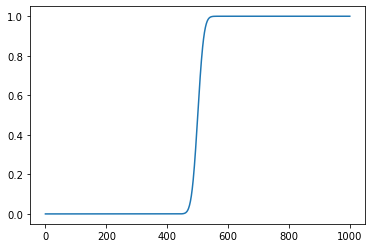

In [57]:
xs = np.arange(0,1000,1)
plt.plot(xs, [normal_cdf(x, mu_0, sigma_0) for x in xs])

In [42]:
inverse_normal_cdf(0.5, mu_0, sigma_0)

500.0000033304095

## $p$-value calculation

Now we can get a (two-sided) $p$-value which is the probability of observing a value as extreme as the one we did. I.e. if we see $t$ heads, want to know what the probability in the tail that starts at $t$ (in the case $t > \mu$ or stops at $t$ if $t < \mu$.

In [53]:
def two_sided_p(x, mu, sigma):
    if x >= mu:
        return 2 * normal_probability_above(x,mu,sigma)
    else:
        return 2 * normal_cdf(x,mu,sigma)

The $p$-value also answers the question: under our assumptions, what is the probability of seeing a value as extreme as we did?

In [63]:
two_sided_p(469, mu_0, sigma_0)

0.04992428403969751

### Steps to get a $p$-value

1. Design the experiment
2. Make assumptions and decide what distribution your observations *should* look like
3. Have the ability to calculate the tail probabilities for that distribution
4. Do the experiment
5. Figure out (via caclulation, analysis, z-table) the probability of observing a value that extreme

In the A/B test example, we're observing two different random variables, $n_A$ and $n_B$, the number of people who click on add $A$ and $B$, respectively. Call $N_A$ and $N_B$ the numbers of people who were *shown* ads $A$ and $B$, respectively. What we're ultimately observing then, are two different Binomial distributions! We want a hypothesis to assert a relationship, e.g. "Add A is just as clickbaity as ad B". Or, formally, the click-rate of ad A is the same as ad B, i.e. the *bias* of the Binomials are the same.

So, this means $n_A / N_A$ (with enough samples) will be approximately Normally distributed with mean $p_A$, the probability of clicking ad A, and similarly, $n_B / N_B$ will be Normal with mean $p_B$. The standard deviations will be $\sigma_A = \sqrt{p_A (1-p_A) / N_A }$ and $\sigma_B = \sqrt{p_B (1-p_B) / N_B }$.

In [72]:
def ab_parameters(n,N):
    mu = n/N
#     print(mu * (1-mu))
    sigma = math.sqrt(mu * (1-mu) / N)
    return mu, sigma

We want, then, to talk about the difference $p_A - p_B$ and hypothesize that it is 0. That difference will also be -- according to the CLT -- normally distributed with mean $p_A - p_B$ and standard deviation $\sqrt{\sigma_A^2 + \sigma_B^2}$.

In [86]:
def ab_statistic(nA, NA, nB, NB):
    mu_A, sigma_A = ab_parameters(nA, NA)
    mu_B, sigma_B = ab_parameters(nB, NB)
    #print(sigma_A)
    #print(sigma_B)
    return (mu_A - mu_B)/math.sqrt(sigma_A**2 + sigma_B**2)

In [97]:
z = ab_statistic(140, 1000, 180, 1000)
z

-2.443388887126103

In [100]:
two_sided_p(z,0,1) # 0,1 because CLT says it will be standard after diving by sqrt(std)

0.014550049247422092